<a href="https://colab.research.google.com/github/FabiusPaulus/Projekt24/blob/main/Kopie_von_Kopie_von_Kidney_Disease_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Biblotheken importieren

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [4]:
#Einlesen der Daten
df= pd.read_csv('/chronic_kidney_disease.csv')
df.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#Spalte ID entfernen
df.drop('id', axis = 1, inplace = True)

In [6]:
#Spaltennamen ändern

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
#Vorschau der Daten
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# **Explorative Datenanalyse**


In [8]:
df.shape

(400, 25)

In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,119,87,35,43,119,43,90,49,3,3,3,3,3,3,2
top,60,80,1020,0,0,normal,normal,notpresent,notpresent,?,?,1.2,?,?,?,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,19,40,87,88,52,71,106,131,251,261,364,317,323,339,250


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      400 non-null    object
 1   blood_pressure           400 non-null    object
 2   specific_gravity         400 non-null    object
 3   albumin                  400 non-null    object
 4   sugar                    400 non-null    object
 5   red_blood_cells          400 non-null    object
 6   pus_cell                 400 non-null    object
 7   pus_cell_clumps          400 non-null    object
 8   bacteria                 400 non-null    object
 9   blood_glucose_random     400 non-null    object
 10  blood_urea               400 non-null    object
 11  serum_creatinine         400 non-null    object
 12  sodium                   400 non-null    object
 13  potassium                400 non-null    object
 14  haemoglobin              400 non-null    o

In [11]:
# Konvertierung Datentyp

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
# Datentypen zeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    object 
 1   blood_pressure           400 non-null    object 
 2   specific_gravity         400 non-null    object 
 3   albumin                  400 non-null    object 
 4   sugar                    400 non-null    object 
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    object 
 10  blood_urea               400 non-null    object 
 11  serum_creatinine         400 non-null    object 
 12  sodium                   400 non-null    object 
 13  potassium                400 non-null    object 
 14  haemoglobin              4

In [13]:
#Extrahierung von nummerischen und kategorischen Spalten

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
#Ausgabe kategorischer Spalten
print(cat_cols)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [15]:
#Darstellung der möglichen Werte in kategorischen Spalten

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] values

blood_pressure has ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120'] values

specific_gravity has ['1020' '1010' '1005' '1015' '?' '1025'] values

albumin has ['1' '4' '2' '3' '0' '?' '5'] values

sugar has ['0' '3' '4' '1' '?' '2' '5'] values

red_blood_cells has ['?' 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' '?'] values

pus_cell_clumps has ['notpresent' 'present' '?'] values

bacteria has ['notpresent' 'present' '?'] values

blood_glucose_random has ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '1

In [16]:
#Ersetzen von fehlerhaften Einträgen

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [17]:
#Alle 0 und 1 zu int oder float konvertieren oder als NaN deklarieren

df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

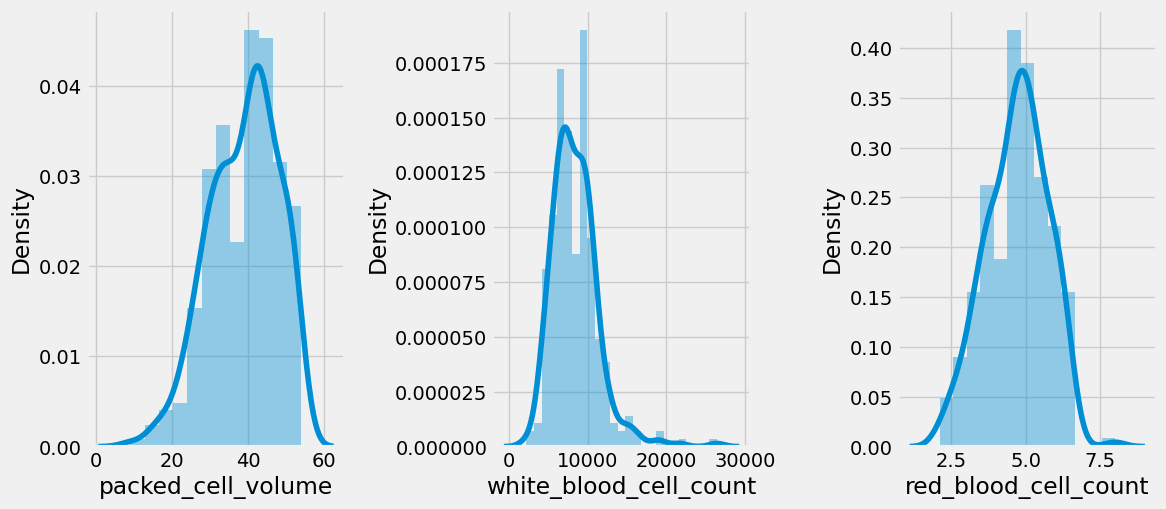

In [18]:
# auf Normalverteilung prüfen

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

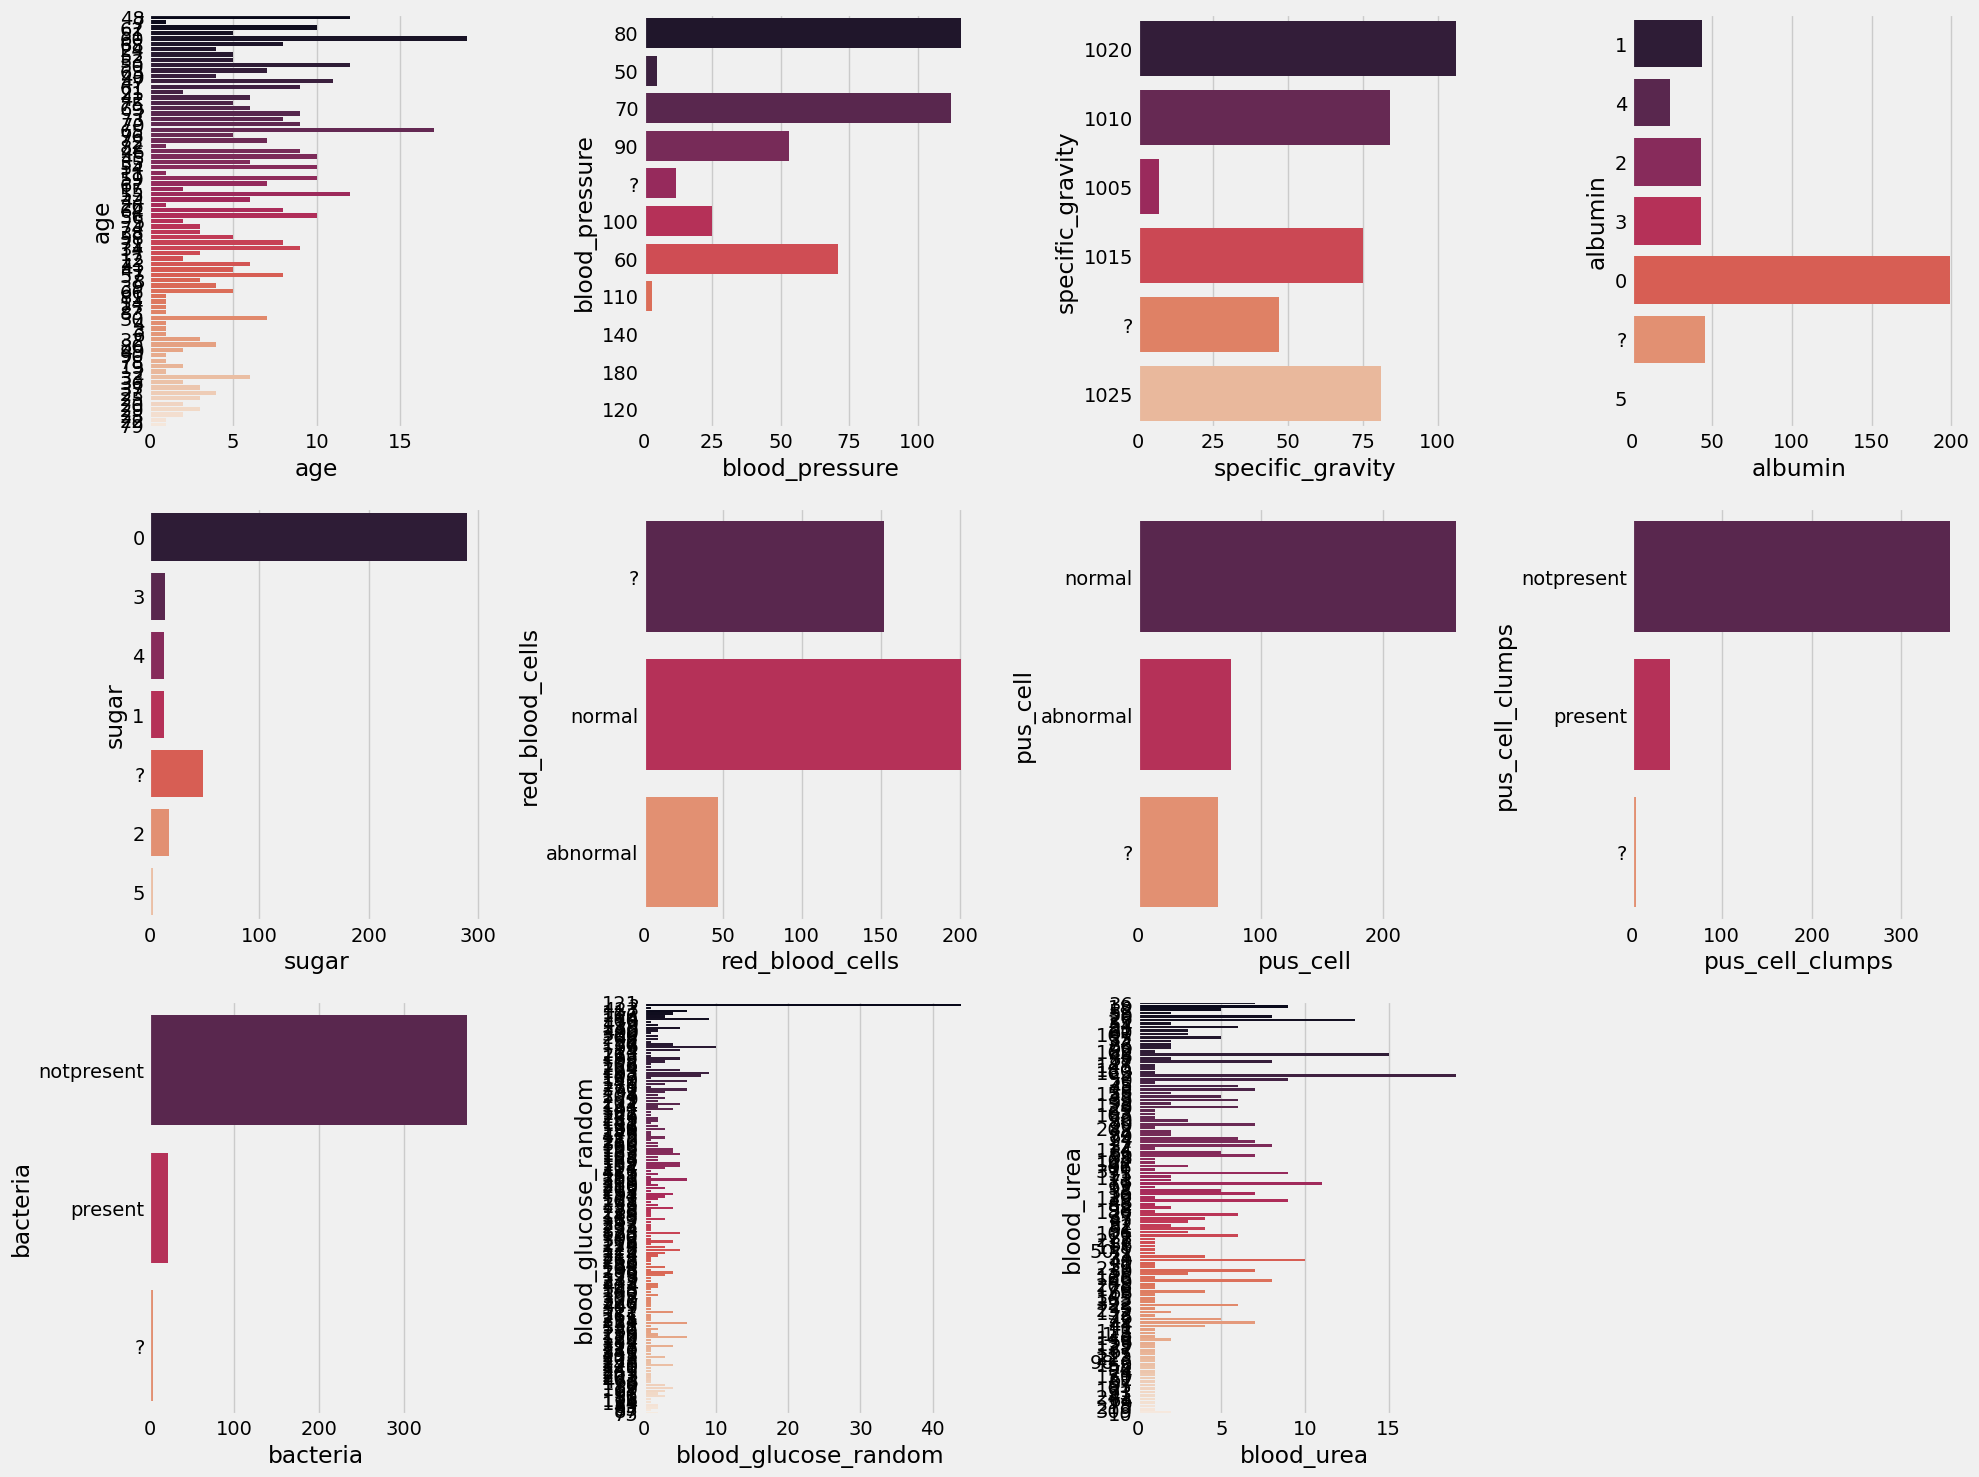

In [19]:
# kategorische Spalten betrachten

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

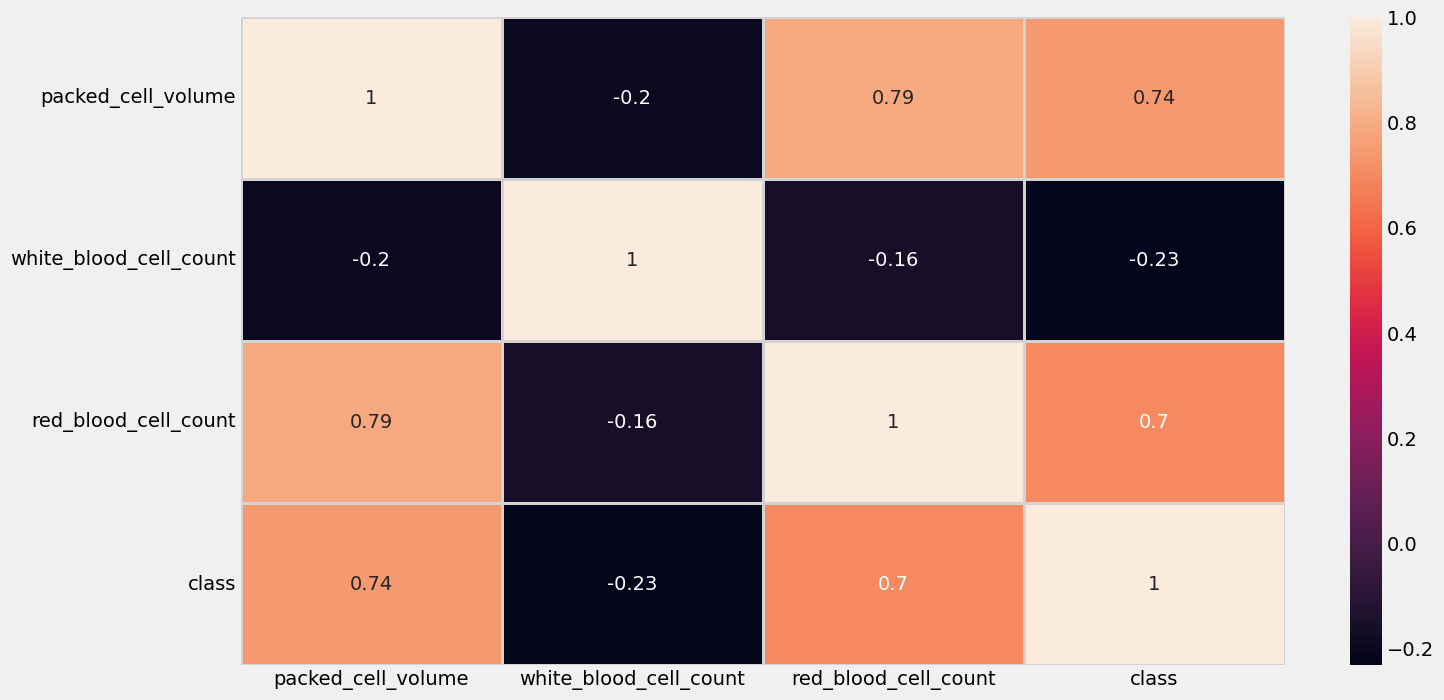

In [20]:
# heatmap der Daten erstellen

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [21]:
def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

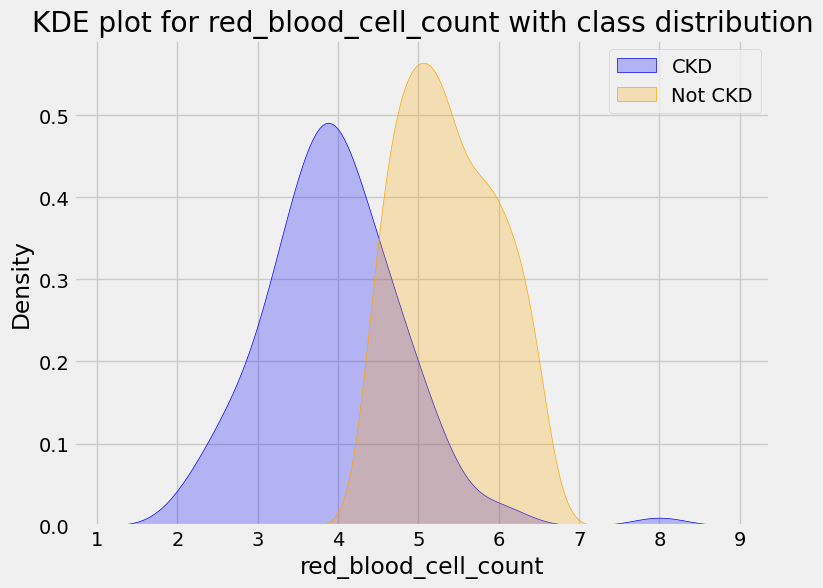

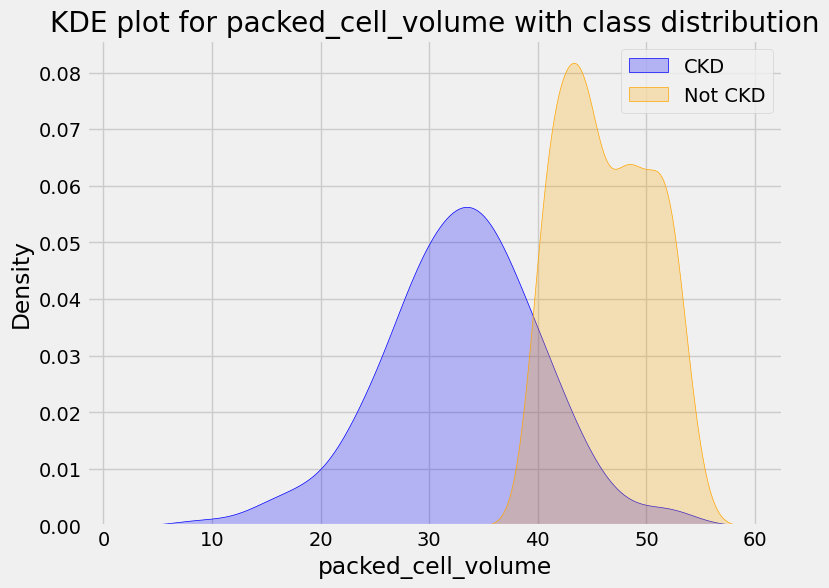

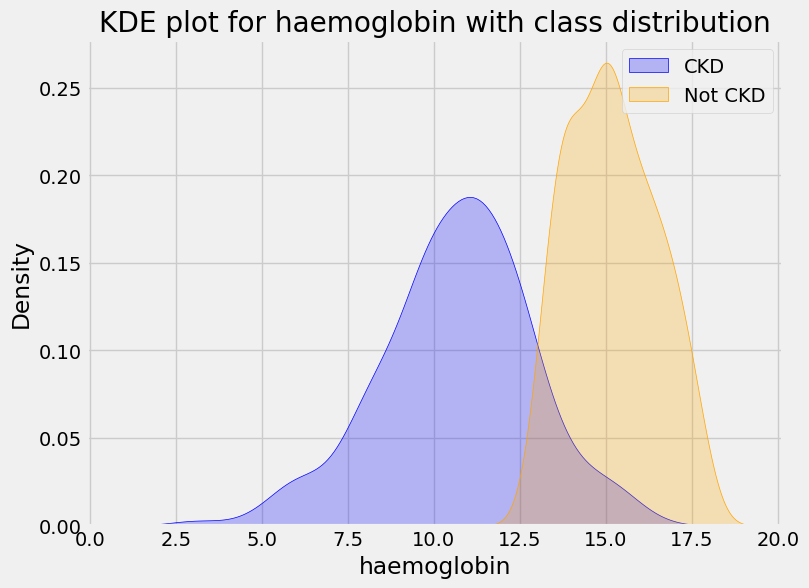

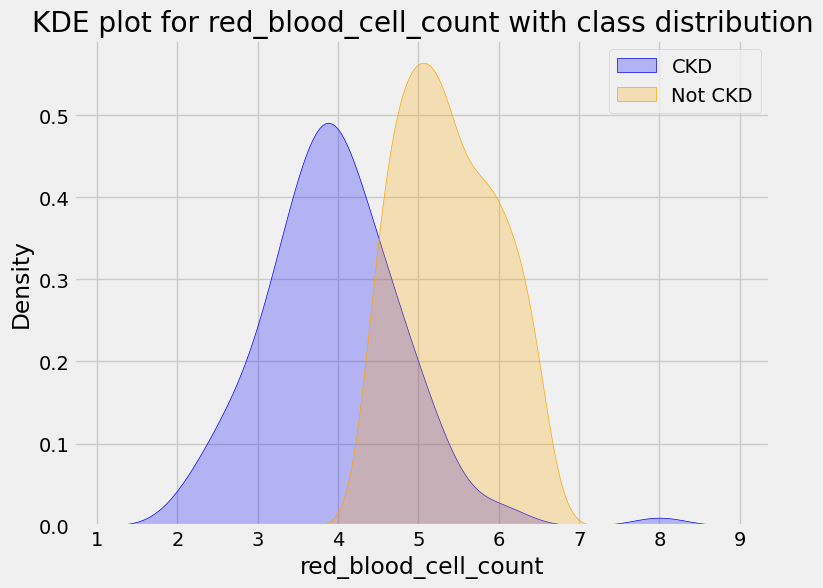

In [22]:
  def kde(col):
    plt.figure(figsize=(8, 6))
    # Replace "?" with NaN and then convert to numeric
    df_numeric_ckd = pd.to_numeric(df[df['class'] == 0][col].replace('?', np.nan), errors='coerce')
    sns.kdeplot(df_numeric_ckd, shade=True, label='CKD', color='blue')  # Set color for CKD class
    # Replace "?" with NaN and then convert to numeric
    df_numeric_notckd = pd.to_numeric(df[df['class'] == 1][col].replace('?', np.nan), errors='coerce')
    sns.kdeplot(df_numeric_notckd, shade=True, label='Not CKD', color='orange')  # Set color for non-CKD class
    plt.xlabel(col)
    plt.title(f'KDE plot for {col} with class distribution')
    plt.legend()
    plt.show()

kde('red_blood_cell_count')
kde('packed_cell_volume')
kde('haemoglobin')

kde('red_blood_cell_count')

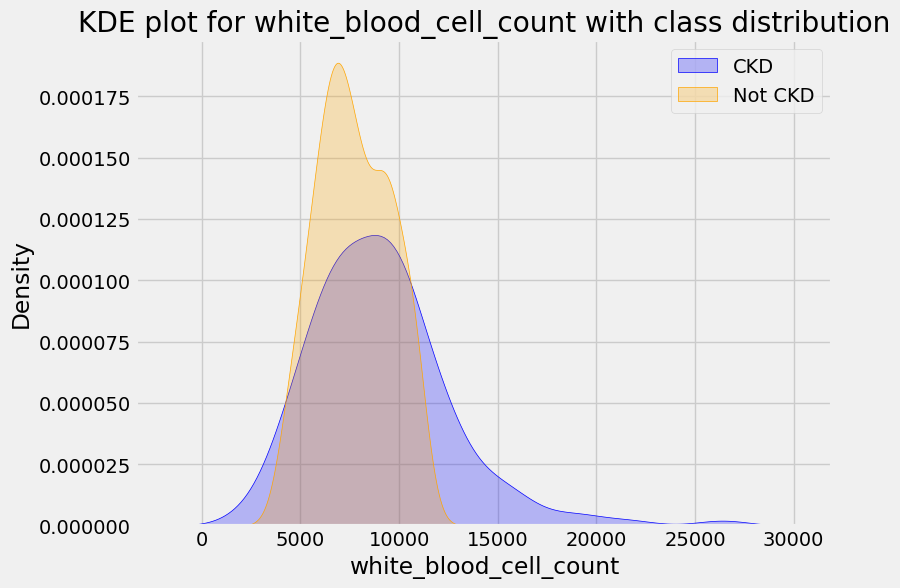

In [23]:
kde('white_blood_cell_count')

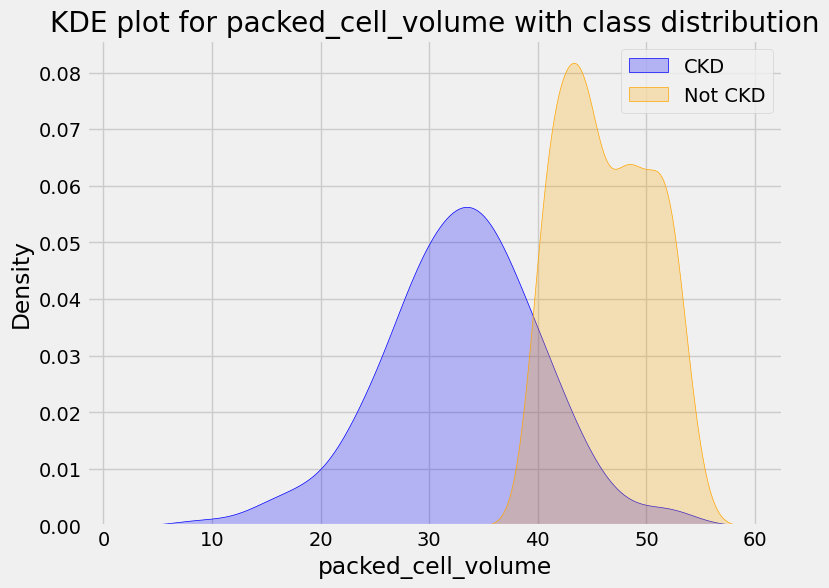

In [24]:
kde('packed_cell_volume')

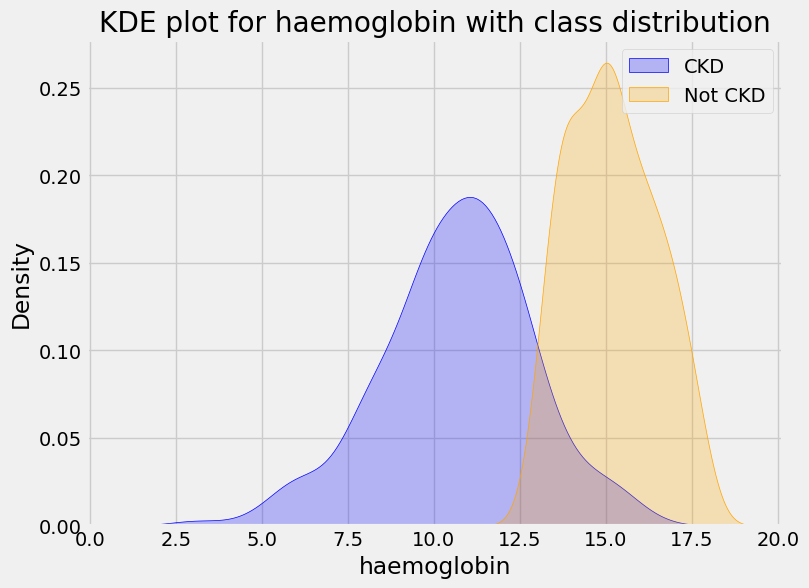

In [25]:
kde('haemoglobin')

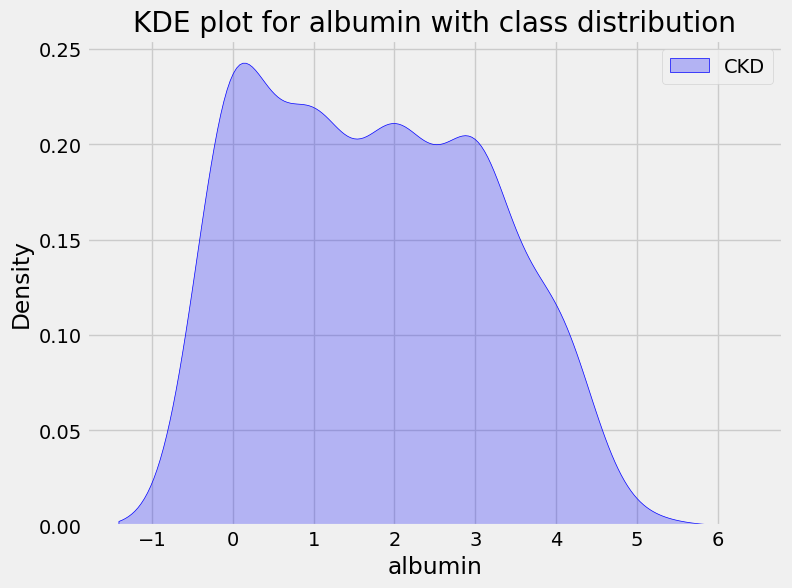

In [26]:
kde('albumin')

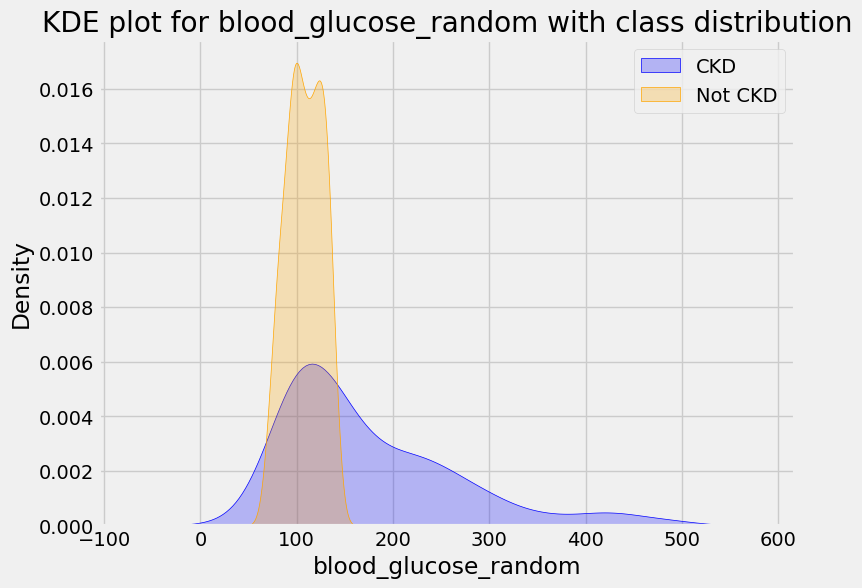

In [27]:
kde('blood_glucose_random')

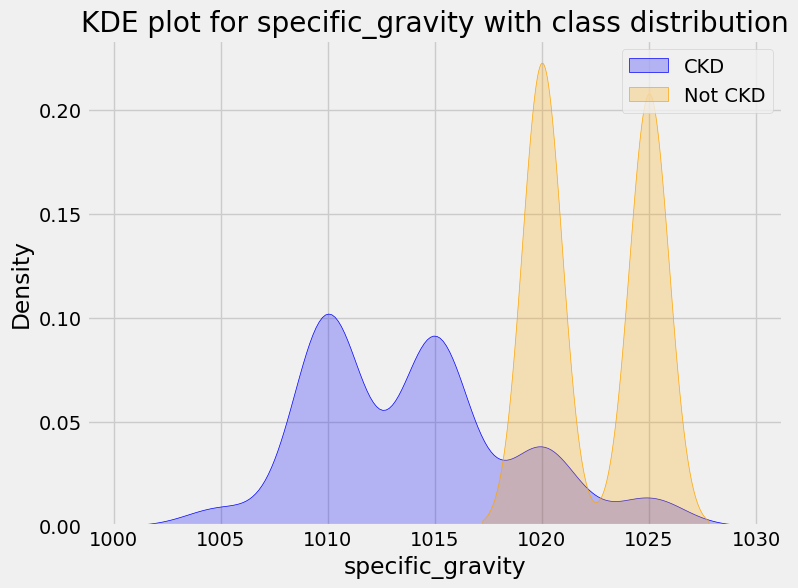

In [28]:
kde('specific_gravity')

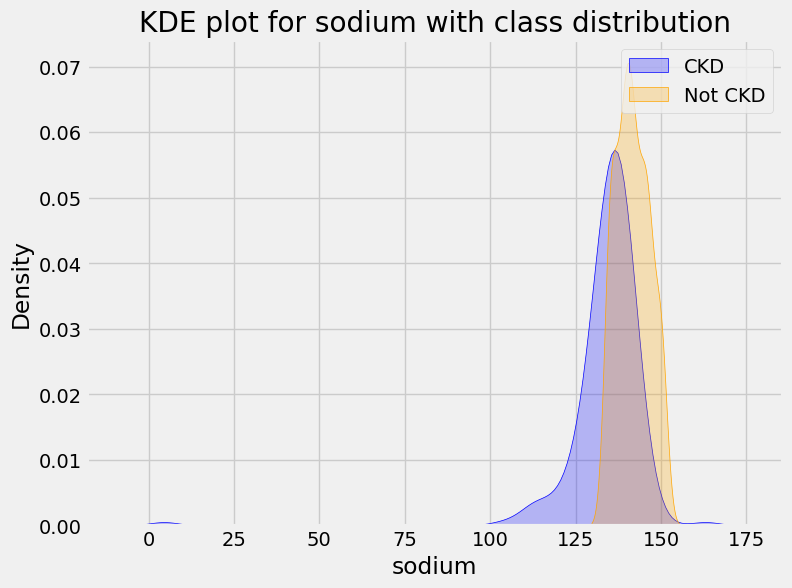

In [29]:
kde('sodium')

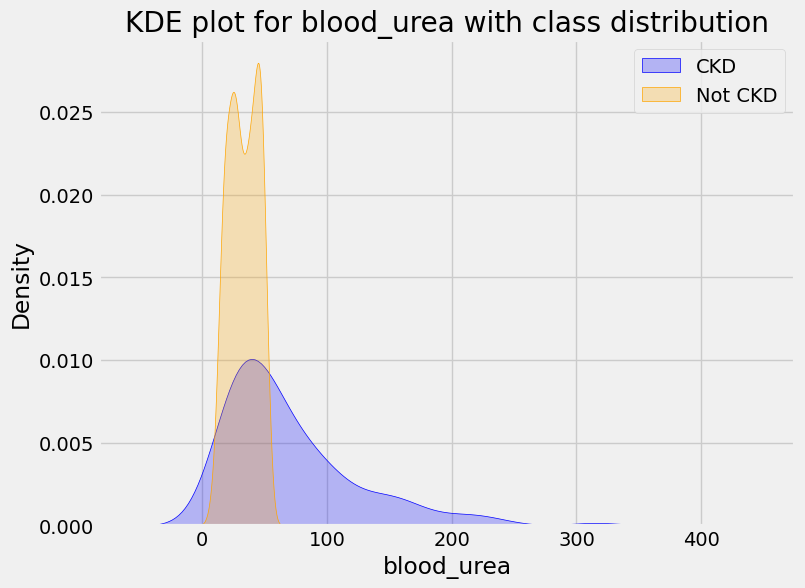

In [30]:
kde('blood_urea')

In [31]:
# Null-werte prüfen

df.isna().sum().sort_values(ascending = False)

red_blood_cell_count       131
white_blood_cell_count     106
packed_cell_volume          71
age                          0
potassium                    0
aanemia                      0
peda_edema                   0
appetite                     0
coronary_artery_disease      0
diabetes_mellitus            0
hypertension                 0
haemoglobin                  0
sodium                       0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
bacteria                     0
pus_cell_clumps              0
pus_cell                     0
red_blood_cells              0
sugar                        0
albumin                      0
specific_gravity             0
class                        0
dtype: int64

In [32]:
df[num_cols].isnull().sum()

packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [33]:
df[cat_cols].isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [34]:
# Null-Werte füllen mit random sampling für höhere Werte and mean/mode sampling für niedrigere Werte

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [35]:
df.isna().sum().sort_values(ascending = False)

red_blood_cell_count       131
white_blood_cell_count     106
packed_cell_volume          71
age                          0
potassium                    0
aanemia                      0
peda_edema                   0
appetite                     0
coronary_artery_disease      0
diabetes_mellitus            0
hypertension                 0
haemoglobin                  0
sodium                       0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
bacteria                     0
pus_cell_clumps              0
pus_cell                     0
red_blood_cells              0
sugar                        0
albumin                      0
specific_gravity             0
class                        0
dtype: int64

In [36]:
df[num_cols].isnull().sum()

packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [37]:
# Null-Werte "red_blood_cells" und "pus_cell" auffüllen mit random sampling Methode und cat_cols auffüllen mit mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [38]:
#Null-Werte prüfen
df[cat_cols].isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [39]:
#prüfen wieviele verschiedene Werte die kategorischen Spalten haben
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

age has 77 categories

blood_pressure has 11 categories

specific_gravity has 6 categories

albumin has 7 categories

sugar has 7 categories

red_blood_cells has 3 categories

pus_cell has 3 categories

pus_cell_clumps has 3 categories

bacteria has 3 categories

blood_glucose_random has 147 categories

blood_urea has 119 categories

serum_creatinine has 87 categories

sodium has 35 categories

potassium has 43 categories

haemoglobin has 119 categories

hypertension has 3 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 3 categories

appetite has 3 categories

peda_edema has 3 categories

aanemia has 3 categories

class has 2 categories



In [40]:
#LabelEncoder um kategorische Werte in nummerische umzuwandeln

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,36,8,3,1,0,0,2,1,1,21,63,9,34,42,57,44.0,7800.0,5.2,2,2,1,1,1,1,0
1,60,5,3,4,0,0,2,1,1,146,32,4,34,42,13,38.0,6000.0,NaN,1,1,1,1,1,1,0
2,52,8,1,2,3,2,2,1,1,114,81,15,34,42,114,31.0,7500.0,NaN,1,2,1,2,1,2,0
3,36,7,0,4,0,2,1,2,1,17,84,55,1,0,12,32.0,6700.0,3.9,2,1,1,2,2,2,0
4,40,8,1,2,0,2,2,1,1,6,51,11,34,42,16,35.0,7300.0,4.6,1,1,1,1,1,1,0


In [42]:
#Aufteilung in unabhängige und abhängige Variablen
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [43]:
#wähle speziell die unabhängigen Variablen aus
ind_col = []
dep_col = 'class'

for col in df.columns:
  if col == 'specific_gravity':
      ind_col.append(col)
  if col == 'haemoglobin':
      ind_col.append(col)
  if col == 'packed_cell_volume':
      ind_col.append(col)

X = df[ind_col]
y = df[dep_col]

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   specific_gravity    400 non-null    int64  
 1   haemoglobin         400 non-null    int64  
 2   packed_cell_volume  329 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [45]:
# Aufteilung in Trainings- und Testdaten

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(y_train.isnull().sum())


0


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definiere eine Pipeline mit Imputer und KNeighborsClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # Hier kannst du die Strategie für die Imputation festlegen
    ('classifier', KNeighborsClassifier())
])

# Trainiere das Modell mit der Pipeline
pipeline.fit(X_train, y_train)

# Bewertung des Modells
knn_acc = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Test Accuracy of KNN is {knn_acc}")


Test Accuracy of KNN is 0.9416666666666667


## Anwendung des trainierten KNN in einer Applikation. Die Daten für 'specific_gravity', 'haemoglobin' und 'packed_cell_colume' eintragen und direkt eine Auswertung bekommen, ob Krankheit vorliegt

In [ ]:
# Eingabeaufforderungen für den Benutzer
specific_gravity = input("Geben Sie den Wert für 'specific_gravity' ein: ")
haemoglobin = input("Geben Sie den Wert für 'haemoglobin' ein: ")
packed_cell_volume = input("Geben Sie den Wert für 'packed_cell_volume' ein: ")

# Erstellung eines DataFrame aus den Benutzereingaben
# Wir müssen die Daten in ein "pd.Dataframe" Format bringen, weil knn.predict() solch ein Format erwartet.
data_to_predict = pd.DataFrame({
    'specific_gravity': [float(specific_gravity)],
    'haemoglobin': [float(haemoglobin)],
    'packed_cell_volume': [float(packed_cell_volume)]
})

# Verwendung des trainierten Modells zur Vorhersage
predictions = knn.predict(data_to_predict)

# Ausgabe der Vorhersage mit benutzerfreundlicher Nachricht
if predictions[0] == 0:
    print("Der Patient hat eine chronische Nierenerkrankung.")
else:
    print("Der Patient hat keine chronische Nierenerkrankung.")